虽然决策树通常是不稳定的，这意味着数据的微小变化会导致最优树结构的巨大变化，但其简单性使其成为广泛应用的有力候选。在神经网络流行之前，决策树是机器学习中最先进的算法。其他一些集成模型，比如随机森林模型，比普通决策树模型更强大。

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

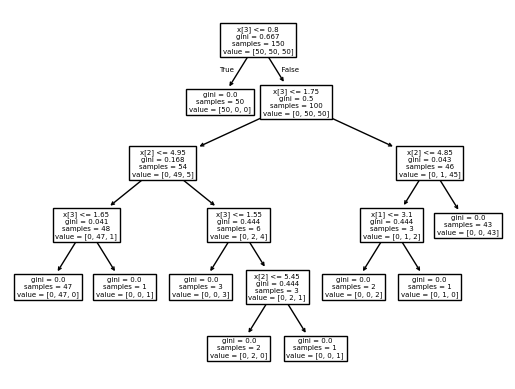

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

模拟数据集信息:
   Age Sex      BP Cholesterol    Na_to_K   Drug
0   58   M  NORMAL        HIGH  36.861586  drugX
1   71   M  NORMAL      NORMAL  26.124217  drugX
2   48   M  NORMAL        HIGH  17.907420  drugB
3   34   F  NORMAL        HIGH  30.078161  drugX
4   62   F    HIGH        HIGH  22.376678  drugY
5   27   F     LOW      NORMAL  18.851578  drugA
6   40   F     LOW        HIGH  29.972868  drugA
7   58   M     LOW        HIGH  14.456621  drugA
8   77   F     LOW      NORMAL  17.228586  drugA
9   38   M  NORMAL        HIGH  20.771363  drugB

数据形状: (200, 6)

药物分布:
Drug
drugA    68
drugB    60
drugX    33
drugY    25
drugC    14
Name: count, dtype: int64

预处理后的数据:
   Age  Sex  BP  Cholesterol    Na_to_K   Drug
0   58    0   1            1  36.861586  drugX
1   71    0   1            0  26.124217  drugX
2   48    0   1            1  17.907420  drugB
3   34    1   1            1  30.078161  drugX
4   62    1   2            1  22.376678  drugY

特征矩阵形状: (200, 5)
目标变量形状: (200,)

训练集大小: 160
测

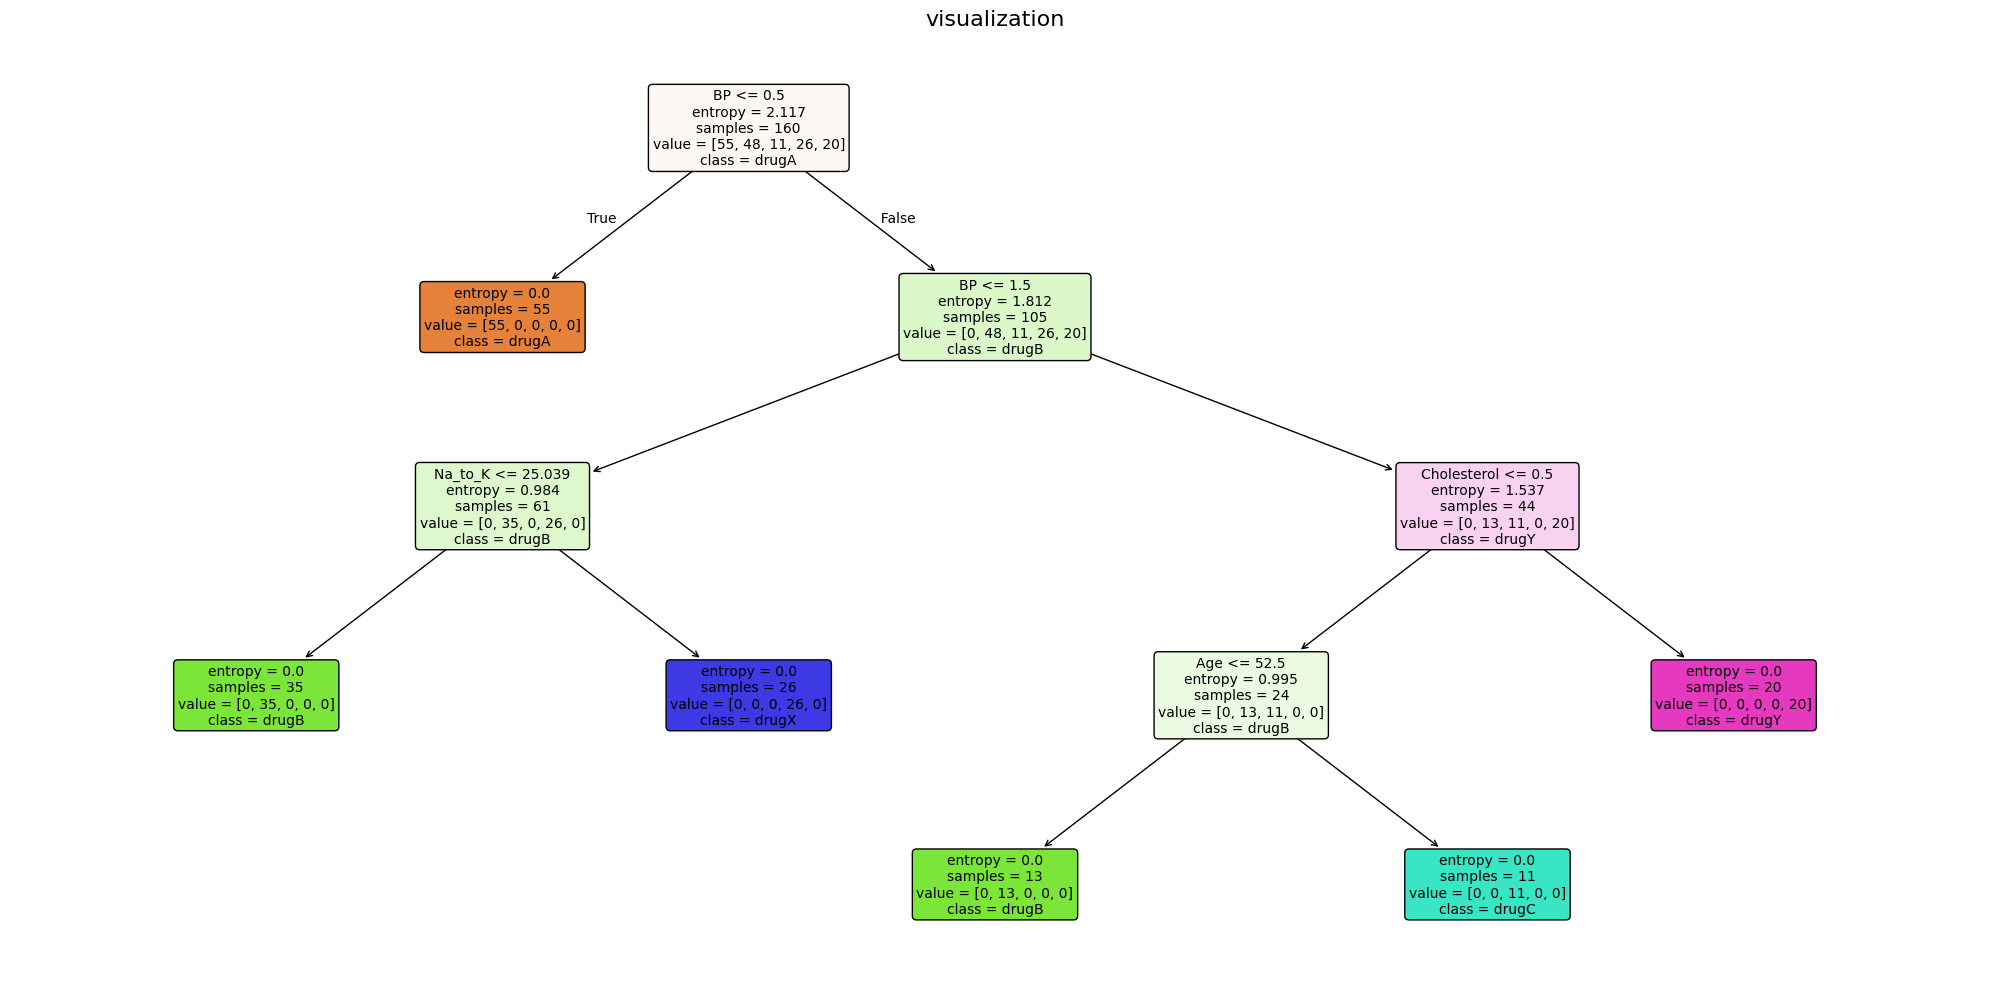


特征重要性:
Age: 0.070
Sex: 0.000
BP: 0.623
Cholesterol: 0.129
Na_to_K: 0.177

预测示例:
案例 1: [45, 0, 2, 1, 30.5] -> 预测药物: drugY (概率: 1.00)
案例 2: [25, 1, 0, 0, 15.2] -> 预测药物: drugA (概率: 1.00)
案例 3: [60, 0, 1, 0, 20.1] -> 预测药物: drugB (概率: 1.00)


In [5]:
import pandas as pd # 数据处理
import numpy as np # 使用数组
import matplotlib.pyplot as plt # 可视化
from matplotlib import rcParams # 图大小

from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.model_selection import train_test_split # 拆分数据
from sklearn.metrics import accuracy_score # 模型准确度
from sklearn.tree import plot_tree # 树图

rcParams['figure.figsize'] = (15, 10)

# 创建模拟药物数据
np.random.seed(42)
n_samples = 200

# 生成模拟数据
data = {
    'Age': np.random.randint(20, 80, n_samples),
    'Sex': np.random.choice(['M', 'F'], n_samples),
    'BP': np.random.choice(['LOW', 'NORMAL', 'HIGH'], n_samples),
    'Cholesterol': np.random.choice(['NORMAL', 'HIGH'], n_samples),
    'Na_to_K': np.random.uniform(6, 40, n_samples)
}

# 创建药物标签（基于一些规则来模拟真实情况）
drugs = []
for i in range(n_samples):
    age = data['Age'][i]
    bp = data['BP'][i]
    chol = data['Cholesterol'][i]
    na_k = data['Na_to_K'][i]
    
    if bp == 'HIGH' and chol == 'HIGH':
        drug = 'drugY'
    elif bp == 'HIGH' and age > 50:
        drug = 'drugC'
    elif bp == 'NORMAL' and na_k > 25:
        drug = 'drugX'
    elif bp == 'LOW':
        drug = 'drugA'
    else:
        drug = 'drugB'
    
    drugs.append(drug)

data['Drug'] = drugs

# 创建DataFrame
df = pd.DataFrame(data)

print("模拟数据集信息:")
print(df.head(10))
print(f"\n数据形状: {df.shape}")
print(f"\n药物分布:")
print(df['Drug'].value_counts())

# 数据预处理 - 将分类变量转换为数值
df_processed = df.copy()

# 性别编码
df_processed['Sex'] = df_processed['Sex'].map({'M': 0, 'F': 1})

# 血压编码
df_processed['BP'] = df_processed['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

# 胆固醇编码
df_processed['Cholesterol'] = df_processed['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

print(f"\n预处理后的数据:")
print(df_processed.head())

# 准备特征和目标变量
X = df_processed[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df_processed['Drug'].values

print(f"\n特征矩阵形状: {X.shape}")
print(f"目标变量形状: {y.shape}")

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")

# 创建和训练决策树模型
model = dtc(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型准确率: {accuracy:.2%}")

# 可视化决策树
feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
target_names = sorted(df['Drug'].unique())

plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=feature_names, 
          class_names=target_names, 
          filled=True, 
          rounded=True,
          fontsize=10)

plt.title('visualization', fontsize=16)
plt.tight_layout()
plt.show()

# 打印特征重要性
feature_importance = model.feature_importances_
print(f"\n特征重要性:")
for i, importance in enumerate(feature_importance):
    print(f"{feature_names[i]}: {importance:.3f}")

# 示例预测
print(f"\n预测示例:")
sample_cases = [
    [45, 0, 2, 1, 30.5],  # 45岁男性，高血压，高胆固醇
    [25, 1, 0, 0, 15.2],  # 25岁女性，低血压，正常胆固醇
    [60, 0, 1, 0, 20.1]   # 60岁男性，正常血压，正常胆固醇
]

for i, case in enumerate(sample_cases):
    prediction = model.predict([case])[0]
    probability = max(model.predict_proba([case])[0])
    print(f"案例 {i+1}: {case} -> 预测药物: {prediction} (概率: {probability:.2f})")